Importing various required packages and libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mplsoccer import Pitch, Sbopen, VerticalPitch

Open the data

In [2]:
parser = Sbopen()
#parser.event(<game_id>) -> check SBdata.ipynb
df = parser.event(69301)[0]

Overview of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3291 entries, 0 to 3290
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3291 non-null   object 
 1   index                           3291 non-null   int64  
 2   period                          3291 non-null   int64  
 3   timestamp                       3291 non-null   object 
 4   minute                          3291 non-null   int64  
 5   second                          3291 non-null   int64  
 6   possession                      3291 non-null   int64  
 7   duration                        2457 non-null   float64
 8   match_id                        3291 non-null   int64  
 9   type_id                         3291 non-null   int64  
 10  type_name                       3291 non-null   object 
 11  possession_team_id              3291 non-null   int64  
 12  possession_team_name            32

A few important columns and their significance for this activity:
1. `id`: Index of the event - To refer to the event
2. `team_name`: Name of the team related to the event - Team taking the shot
3. `player_name`: Name of the player related to the event - Player taking the shot
4. `type_name`: Type of event - Shot
5. `x`: X coordinate location of event - X coordinate where shot was taken
6. `y`: Y coordinate location of event - Y coordinate where shot was taken
7. `outcome_name`: Outcome of the event - Outcome of taking the shot (Goal, Saved, etc.)

We will drop all other columns that are not significant for this activity.

In [4]:
df_clean = df.drop(df.columns.difference(['id', 'team_name','player_name', 'type_name', 'x', 'y', 'outcome_name']), axis = 1)

Overview of the cleaned data

In [5]:
df_clean.head()

,id,type_name,team_name,player_name,x,y,outcome_name
0,e8643796-c76d-44f5-a03d-fa742e051942,Starting XI,England Women's,NaN,NaN,NaN,NaN
1,937f83f8-674d-4c58-81d5-e2101a9f2e60,Starting XI,Sweden Women's,NaN,NaN,NaN,NaN
2,87ba272a-3af0-4fc7-872f-65e8f79fb753,Half Start,England Women's,NaN,NaN,NaN,NaN
3,85d30bef-8b77-405e-bc64-c63ed4d7a6d7,Half Start,Sweden Women's,NaN,NaN,NaN,NaN
4,760528a6-2de2-427f-9795-b2b19819ef1f,Pass,England Women's,Ellen White,60.0,40.0,NaN


In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3291 entries, 0 to 3290
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3291 non-null   object 
 1   type_name     3291 non-null   object 
 2   team_name     3291 non-null   object 
 3   player_name   3279 non-null   object 
 4   x             3266 non-null   float64
 5   y             3266 non-null   float64
 6   outcome_name  503 non-null    object 
dtypes: float64(2), object(5)
memory usage: 180.1+ KB


Find the two teams playing

In [7]:
df_clean.team_name.unique()

array(["England Women's", "Sweden Women's"], dtype=object)

In [8]:
team1, team2 = df_clean.team_name.unique()
print("Team 1: " + team1, "Team 2: " + team2, sep="\n") 

Team 1: England Women's
Team 2: Sweden Women's


Filter the events that were shots and store in a dataframe

In [9]:
df_clean.type_name.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt', 'Carry',
       'Pressure', 'Ball Recovery', 'Clearance', 'Block', 'Dispossessed',
       'Duel', 'Dribbled Past', 'Dribble', 'Interception', 'Goal Keeper',
       'Miscontrol', 'Foul Committed', 'Foul Won', 'Injury Stoppage',
       'Error', 'Shot', 'Substitution', 'Half End', 'Tactical Shift',
       'Bad Behaviour'], dtype=object)

In [10]:
df_clean.values[340][1]

'Shot'

Store the list of shots in a list and create a new data frame using the list 

In [11]:
shots_list = []

for row in df_clean.values:
    if row[1] == "Shot":
        shots_list.append(row)

shots_df = pd.DataFrame(shots_list, columns = df_clean.columns)

Easier way to filter the events that were shots

In [12]:
shots = df_clean.loc[df['type_name'] == 'Shot'].set_index('id')

In [13]:
shots.head()

,type_name,team_name,player_name,x,y,outcome_name
id,,,,,,
f158cbc0-a7a1-4787-8f73-15c66ae55764,Shot,Sweden Women's,Kosovare Asllani,104.7,45.5,Goal
de5c41c5-9200-439e-b051-bfe2016d689a,Shot,Sweden Women's,Eva Sofia Jakobsson,110.9,53.1,Saved to Post
106faebb-00bc-4453-b1c1-1bacdb1ebbc5,Shot,Sweden Women's,Eva Sofia Jakobsson,107.8,26.1,Goal
309f6f06-3977-49ac-8c0b-0e31b54404ed,Shot,England Women's,Lucy Bronze,93.7,51.1,Saved
d1c8dbc7-a164-4e34-8674-1eeba842cbbd,Shot,England Women's,Francesca Kirby,108.0,52.7,Goal


In [14]:
n = shots.shape[0]
print("{n} shots taken during the match".format(n = n))

19 shots taken during the match


Draw the pitch using mplsoccer's Pitch function

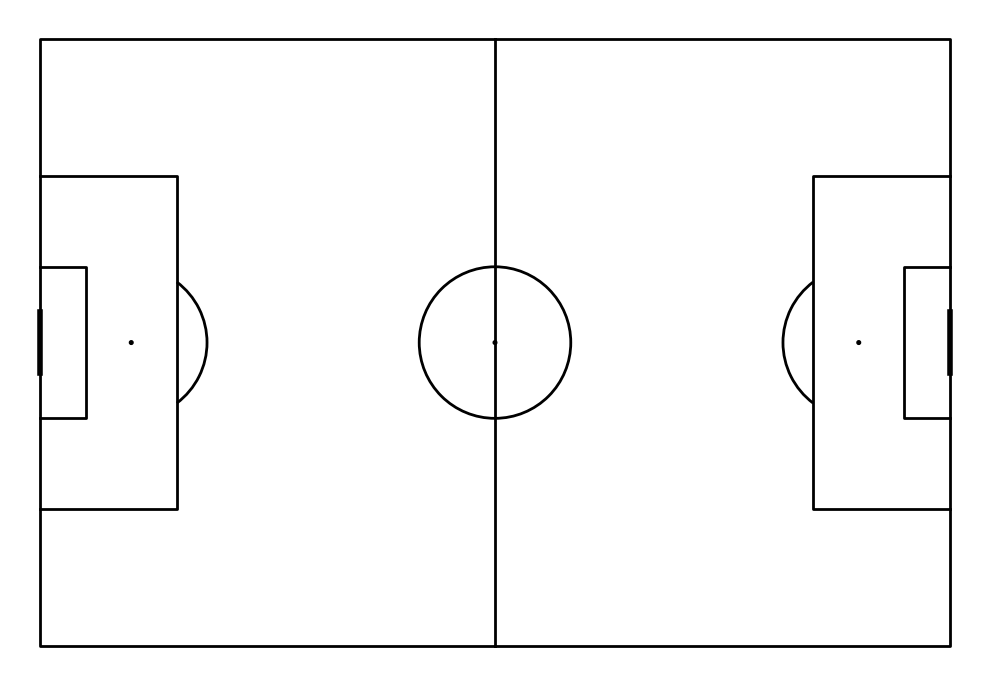

In [15]:
pitch = Pitch(pitch_type = "statsbomb", line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))
pitchLengthX = 120
pitchWidthY = 80

Finding the X and Y coordinates of the shots

In [16]:
shot_no = 0
for i, shot in shots.iterrows():
    shot_no += 1
    print("\n" + "      -------- SHOT {shot_no} --------".format(shot_no = shot_no))
    print("Team taking the shot: {team_name}".format(team_name = shot["team_name"]))
    print("Player taking the shot: {player_name}".format(player_name = shot["player_name"]))
    # print("X coordinate of shot: {shot_x}".format(shot_x = shot['x']))
    # print("Y coordinate of shot: {shot_y}".format(shot_y = shot['y']))
    print("Coordinates of shot: ({shot_x}, {shot_y})".format(shot_x = shot['x'], shot_y = shot['y']))
    print("Outcome of shot: {outcome}".format(outcome = shot['outcome_name']))


      -------- SHOT 1 --------
Team taking the shot: Sweden Women's
Player taking the shot: Kosovare Asllani
Coordinates of shot: (104.7, 45.5)
Outcome of shot: Goal

      -------- SHOT 2 --------
Team taking the shot: Sweden Women's
Player taking the shot: Eva Sofia Jakobsson
Coordinates of shot: (110.9, 53.1)
Outcome of shot: Saved to Post

      -------- SHOT 3 --------
Team taking the shot: Sweden Women's
Player taking the shot: Eva Sofia Jakobsson
Coordinates of shot: (107.8, 26.1)
Outcome of shot: Goal

      -------- SHOT 4 --------
Team taking the shot: England Women's
Player taking the shot: Lucy Bronze
Coordinates of shot: (93.7, 51.1)
Outcome of shot: Saved

      -------- SHOT 5 --------
Team taking the shot: England Women's
Player taking the shot: Francesca Kirby
Coordinates of shot: (108.0, 52.7)
Outcome of shot: Goal

      -------- SHOT 6 --------
Team taking the shot: Sweden Women's
Player taking the shot: Hanna Erica Maria Glas
Coordinates of shot: (83.6, 47.1)
Outc

Giving more structure to the data

In [17]:
shot_data = []
shot_no = 0
for i, shot in shots.iterrows():
    shot_no += 1
    shot_data.append([shot_no, shot["team_name"], shot["player_name"], (shot['x'], shot['y']), shot['outcome_name']])

shot_columns = ["shot_number", "team_name", "player_name", "coordinates", "outcome_name"]
shot_table = pd.DataFrame(shot_data, columns = shot_columns)

shot_table

,shot_number,team_name,player_name,coordinates,outcome_name
0,1,Sweden Women's,Kosovare Asllani,"(104.7, 45.5)",Goal
1,2,Sweden Women's,Eva Sofia Jakobsson,"(110.9, 53.1)",Saved to Post
2,3,Sweden Women's,Eva Sofia Jakobsson,"(107.8, 26.1)",Goal
3,4,England Women's,Lucy Bronze,"(93.7, 51.1)",Saved
4,5,England Women's,Francesca Kirby,"(108.0, 52.7)",Goal
5,6,Sweden Women's,Hanna Erica Maria Glas,"(83.6, 47.1)",Saved
6,7,Sweden Women's,Emma Stina Blackstenius,"(105.4, 25.5)",Off T
7,8,England Women's,Ellen White,"(108.4, 53.3)",Saved
8,9,England Women's,Alex Greenwood,"(84.3, 31.3)",Blocked
9,10,England Women's,Jade Moore,"(81.9, 35.2)",Off T


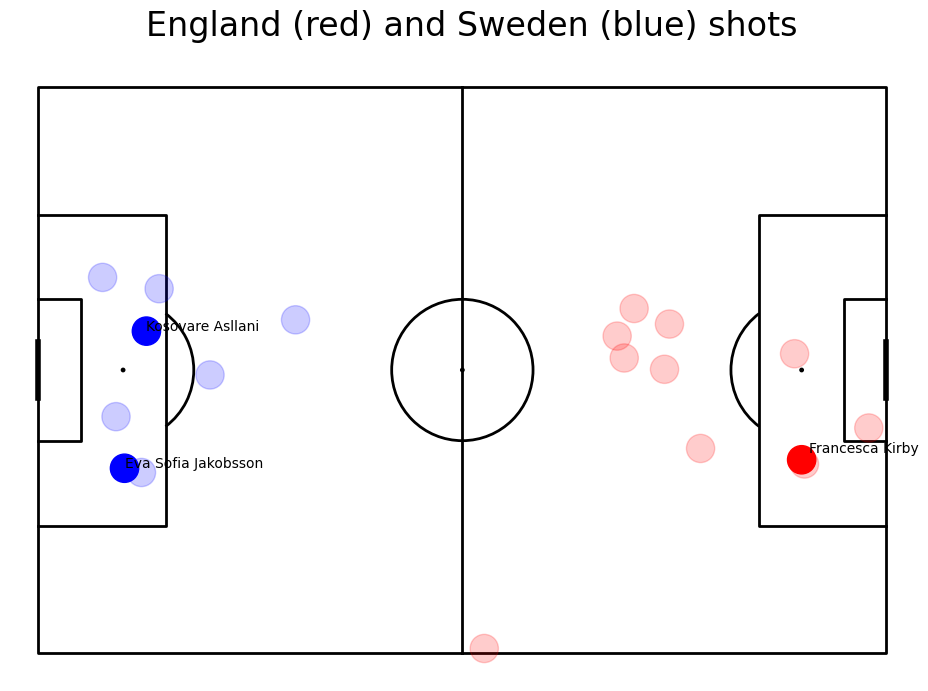

In [18]:
pitch = Pitch(pitch_type = "statsbomb", line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))
pitchLengthX = 120
pitchWidthY = 80

for i, shot in shot_table.iterrows():
    #Get x and y coordinates
    x = shot["coordinates"][0]
    y = shot["coordinates"][1]

    #Set goal as True if outcome was a goal
    goal = shot["outcome_name"] == "Goal"

    #Set team name
    team_name = shot["team_name"]

    #Set player name
    player_name = shot["player_name"]
    
    #set circleSize
    circleSize = 2

    #Plot England Women's
    if (team_name == team1):
        if goal:
            shotCircle = plt.Circle((x, y), radius = circleSize, color = "red")
            plt.text(x + 1, y - 1, player_name)
        else:
            shotCircle = plt.Circle((x, y), radius = circleSize, color = "red")
            #Reduce opacity by setting low alpha value
            shotCircle.set_alpha(.2)
    #Plot Sweden Women's
    else:
        if goal:
            shotCircle = plt.Circle((pitchLengthX - x, pitchWidthY - y), radius = circleSize, color = "blue")
            plt.text(pitchLengthX - x, pitchWidthY - y, player_name)
        else:
            shotCircle = plt.Circle((pitchLengthX - x, pitchWidthY - y), radius = circleSize, color = "blue")
            #Reduce opacity by setting low alpha value
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)

#set title
fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()


In [19]:
def SBcreateShotMap(game_id:int):
    parser = Sbopen()
    #parser.event(<game_id>) -> check SBdata.ipynb
    df = parser.event(game_id)[0]

    #clean the data
    df_clean = df.drop(df.columns.difference(['id', 'team_name','player_name', 'type_name', 'x', 'y', 'outcome_name']), axis = 1)

    #Teams playing
    team1, team2 = df_clean.team_name.unique()

    #Filtering the events that were shots
    shots = df_clean.loc[df['type_name'] == 'Shot'].set_index('id')

    pitch = Pitch(pitch_type = "statsbomb", line_color = "black")
    fig, ax = pitch.draw(figsize=(10, 7))
    pitchLengthX = 120
    pitchWidthY = 80

    for i, shot in shots.iterrows():
        #Get x and y coordinates
        x = shot["x"]
        y = shot["y"]

        #Set goal as True if outcome was a goal
        goal = shot["outcome_name"] == "Goal"

        #Set team name
        team_name = shot["team_name"]

        #Set player name
        player_name = shot["player_name"]
        
        #set circleSize
        circleSize = 2

        #Plot Team 1
        if (team_name == team1):
            if goal:
                shotCircle = plt.Circle((x, y), radius = circleSize, color = "red")
                plt.text(x + 1, y - 1, player_name)
            else:
                shotCircle = plt.Circle((x, y), radius = circleSize, color = "red")
                #Reduce opacity by setting low alpha value
                shotCircle.set_alpha(.2)
        #Plot Team 2
        else:
            if goal:
                shotCircle = plt.Circle((pitchLengthX - x, pitchWidthY - y), radius = circleSize, color = "blue")
                plt.text(pitchLengthX - x, pitchWidthY - y, player_name)
            else:
                shotCircle = plt.Circle((pitchLengthX - x, pitchWidthY - y), radius = circleSize, color = "blue")
                #Reduce opacity by setting low alpha value
                shotCircle.set_alpha(.2)
        ax.add_patch(shotCircle)

    #set title
    fig.suptitle("{team1} (red) and {team2} (blue) shots".format(team1 = team1, team2 = team2), fontsize = 24)
    fig.set_size_inches(10, 7)
    plt.show()   

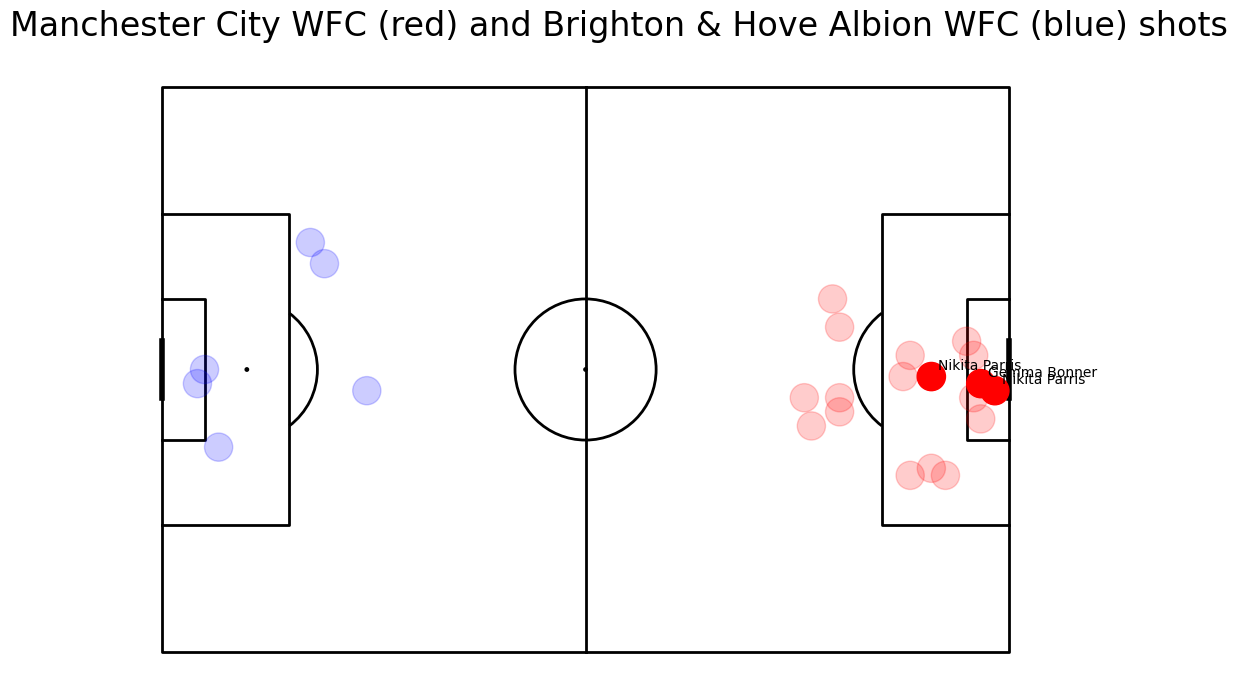

In [20]:
SBcreateShotMap(19790)

Plotting shot map with mplsoccer's Pitch class

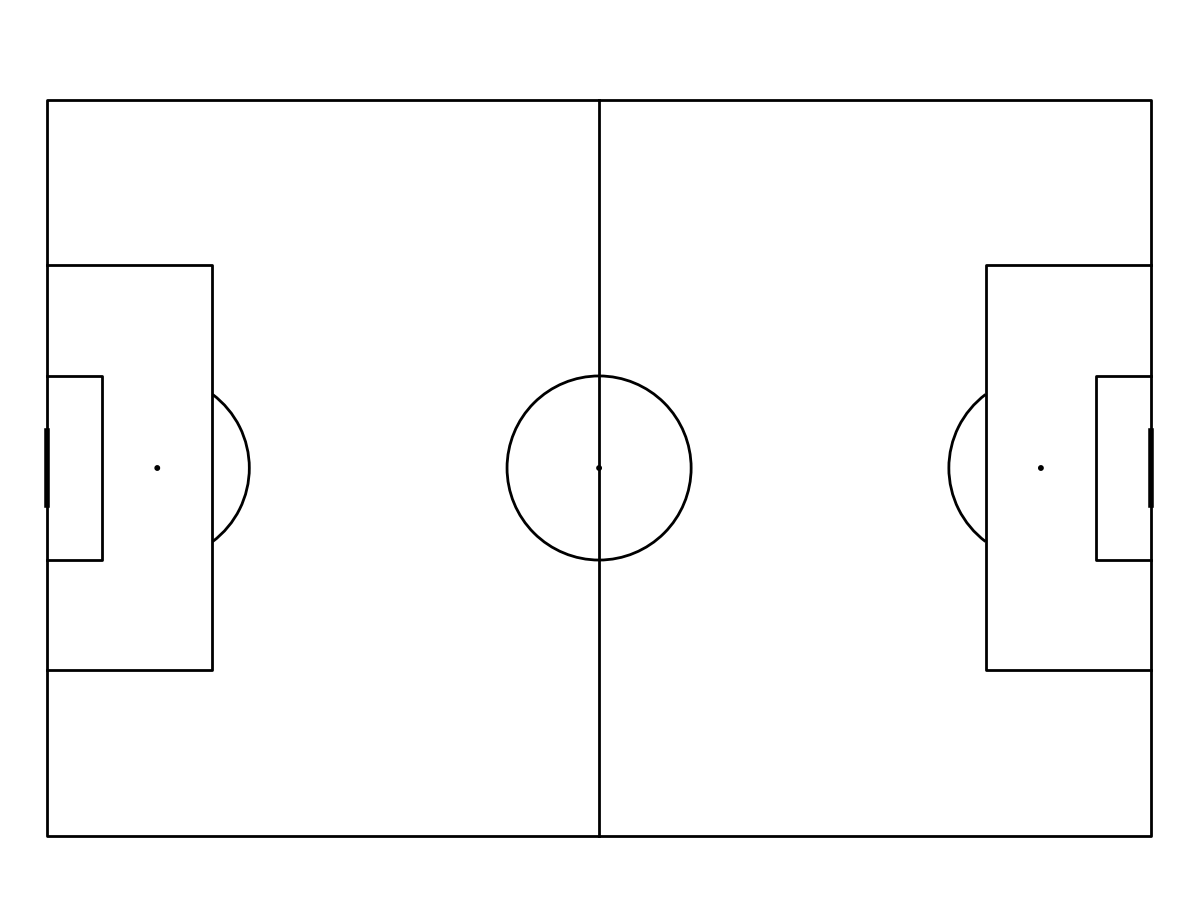

In [32]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.grid(grid_height = 0.9, title_height = 0.06, axis = False, 
                        endnote_height = 0.04, title_space = 0, endnote_space = 0)

In [33]:
team1, team2 = df_clean.team_name.unique()
print("Team 1: " + team1, "Team 2: " + team2, sep="\n") 

Team 1: England Women's
Team 2: Sweden Women's


Query - England

In [43]:
mask_england = (df.type_name == "Shot") & (df.team_name == team1)
df_england = df.loc[mask_england, ['x', 'y', 'outcome_name', 'player_name']]

In [35]:
df_england

,x,y,outcome_name,player_name
742,93.7,51.1,Saved,Lucy Bronze
956,108.0,52.7,Goal,Francesca Kirby
1577,108.4,53.3,Saved,Ellen White
1782,84.3,31.3,Blocked,Alex Greenwood
1794,81.9,35.2,Off T,Jade Moore
2011,88.6,39.9,Blocked,Jill Scott
2204,117.5,48.2,Off T,Stephanie Houghton
2261,63.1,79.4,Wayward,Lucy Bronze
2961,82.9,38.3,Off T,Jade Moore
3119,107.0,37.7,Blocked,Lucy Bronze


Plot them - If shot ended with goal, set alpha = 1 and add name

In [44]:
for i, row in df_england.iterrows():
    if row["outcome_name"] == "Goal":
        #make circle
        pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "red", ax = ax['pitch'])
        pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax = ax['pitch'], fontsize = 12)
    else:
        pitch.scatter(row.x, row.y, alpha = 0.2, s = 500, color = "red", ax = ax['pitch'])

x                         108.0
y                          52.7
outcome_name               Goal
player_name     Francesca Kirby
Name: 956, dtype: object


Query - Sweden

In [45]:
mask_sweden = (df.type_name == 'Shot') & (df.team_name == team2)
df_sweden = df.loc[mask_sweden, ['x', 'y', 'outcome_name', "player_name"]]

In [46]:
df_sweden

,x,y,outcome_name,player_name
340,104.7,45.5,Goal,Kosovare Asllani
531,110.9,53.1,Saved to Post,Eva Sofia Jakobsson
720,107.8,26.1,Goal,Eva Sofia Jakobsson
1327,83.6,47.1,Saved,Hanna Erica Maria Glas
1485,105.4,25.5,Off T,Emma Stina Blackstenius
2325,95.7,39.3,Saved,Julia Zigiotti-Olme
3093,102.9,51.5,Saved,Eva Sofia Jakobsson
3196,109.0,33.4,Saved,Julia Zigiotti-Olme


Plot them - If shot ended with goal, set alpha = 1 and add name

Note: For Sweden we need to revert coordinates

In [47]:
for i, row in df_sweden.iterrows():
    if row["outcome_name"] == 'Goal':
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 1, s = 500, color = "blue", ax = ax['pitch'])
       pitch.annotate(row["player_name"], (120 - row.x + 1, 80 - row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 0.2, s = 500, color = "blue", ax = ax['pitch'])

Putting it all together

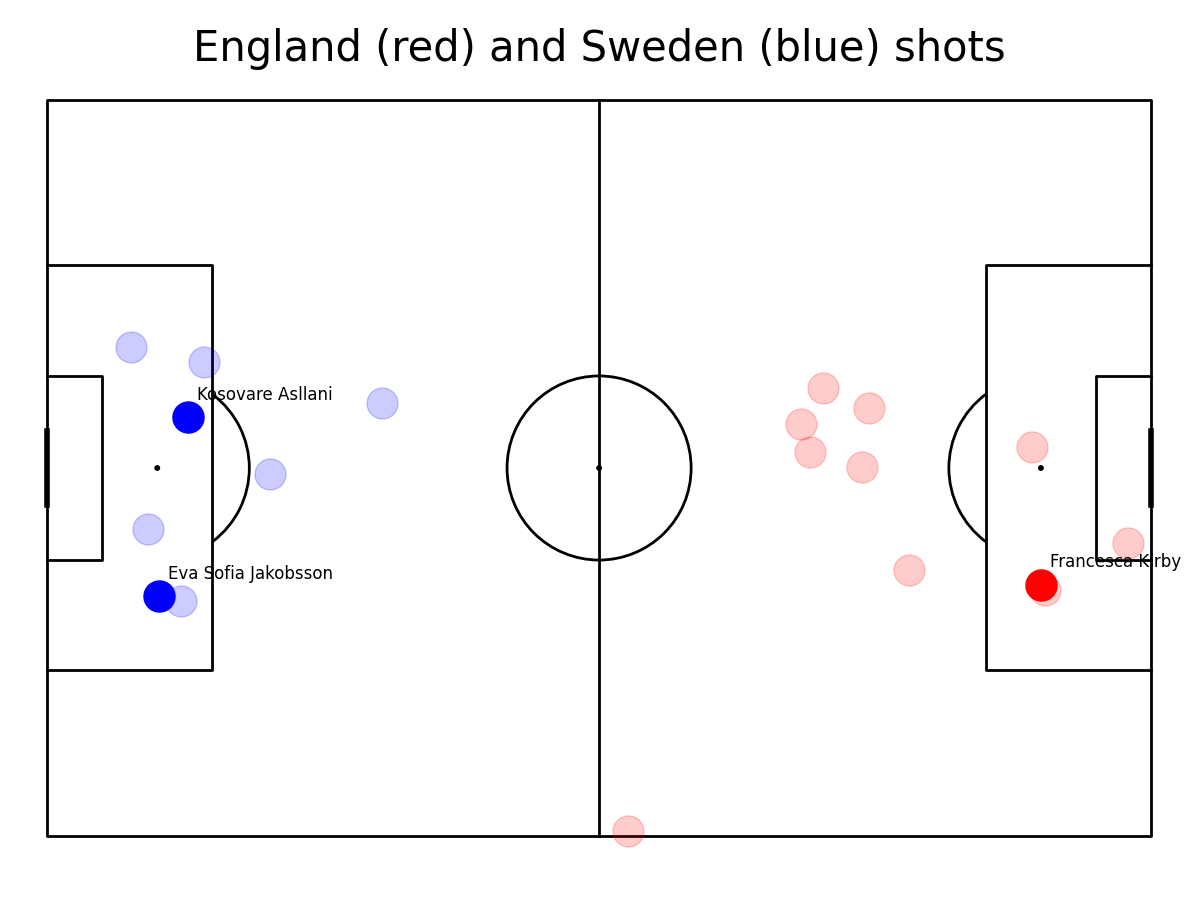

In [49]:
#create pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#query
mask_england = (df.type_name == 'Shot') & (df.team_name == team1)
#finding rows in the df and keeping only necessary columns
df_england = df.loc[mask_england, ['x', 'y', 'outcome_name', "player_name"]]

#plot them - if shot ended with Goal - alpha 1 and add name
#for England
for i, row in df_england.iterrows():
    if row["outcome_name"] == 'Goal':
    #make circle
       pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(row.x, row.y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch'])

mask_sweden = (df.type_name == 'Shot') & (df.team_name == team2)
df_sweden = df.loc[mask_sweden, ['x', 'y', 'outcome_name', "player_name"]]

#for Sweden we need to revert coordinates
for i, row in df_sweden.iterrows():
    if row["outcome_name"] == 'Goal':
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 1, s = 500, color = "blue", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (120 - row.x + 1, 80 - row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])

fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 30)
plt.show()

Plotting shots on one half

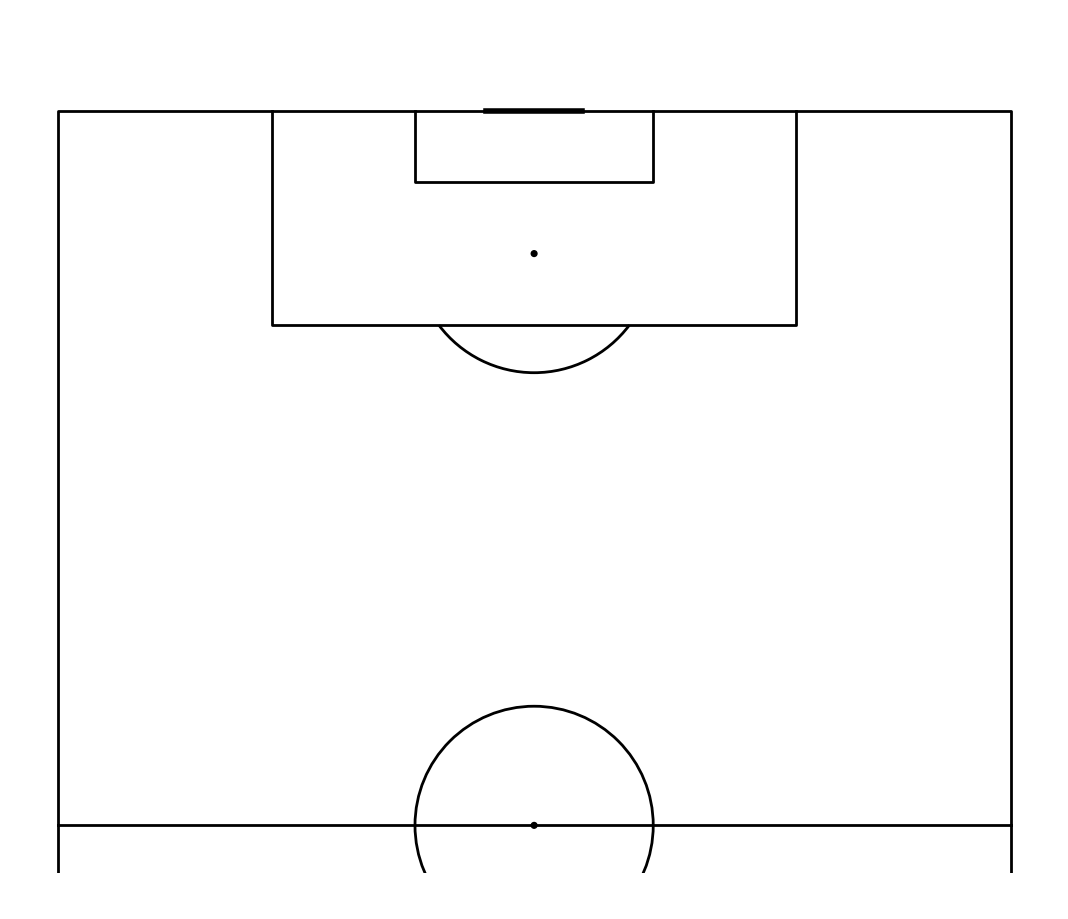

In [50]:
pitch = VerticalPitch(line_color = 'black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

Plotting all shots

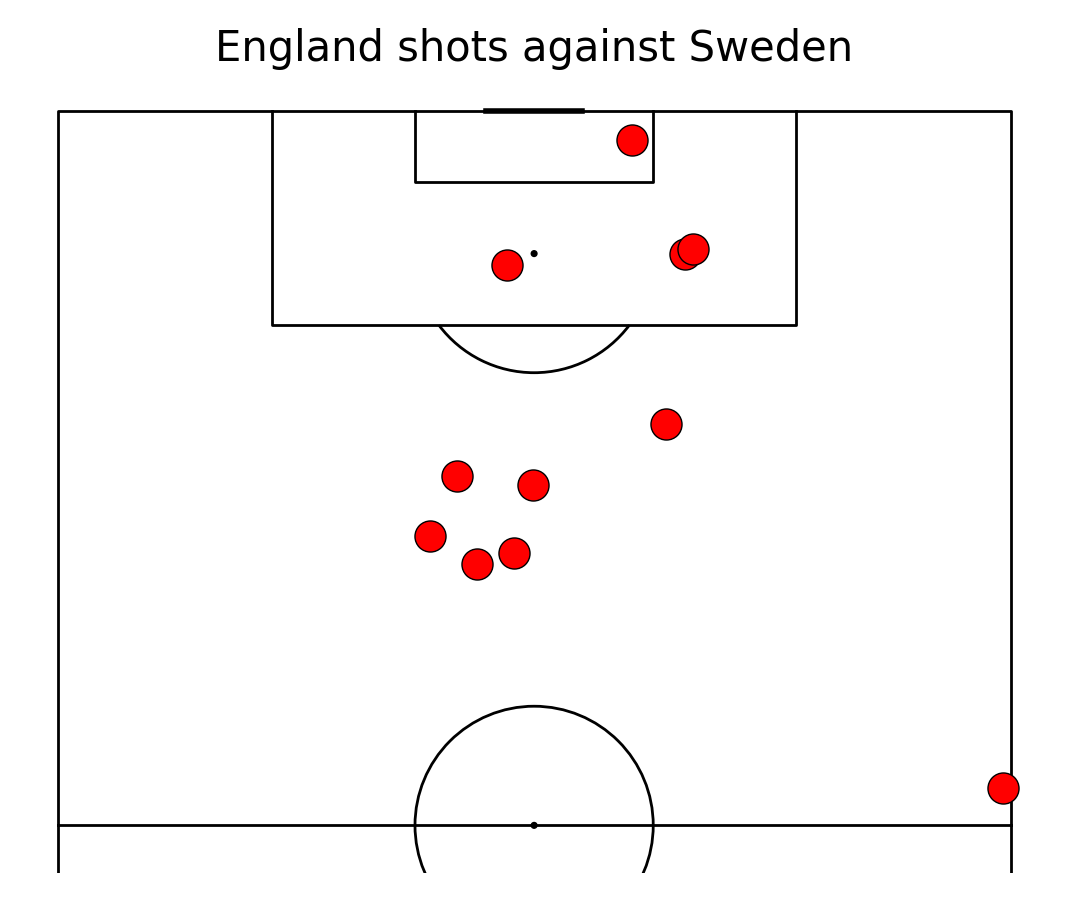

In [52]:
pitch = VerticalPitch(line_color = 'black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

pitch.scatter(df_england.x, df_england.y, alpha = 1, s = 500, color = "red", ax = ax['pitch'], edgecolors = 'black')
fig.suptitle("England shots against Sweden", fontsize = 30)
plt.show()